<a href="https://colab.research.google.com/github/reutDayan1/reutDayan1/blob/main/reut_dayan_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [39]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

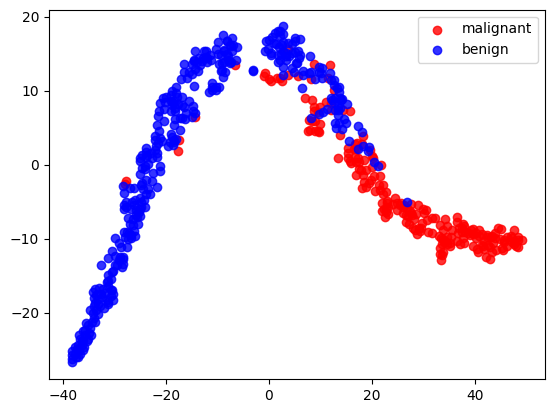

In [58]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

raw_data = my_data.data
target = my_data.target
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(raw_data)
healthy_mask = target == 1
sick_mask = target == 0
plt.scatter(tsne_data[sick_mask, 0], tsne_data[sick_mask, 1],
           color='red', label='malignant', alpha=0.8)
plt.scatter(tsne_data[healthy_mask, 0], tsne_data[healthy_mask, 1],
           color='blue', label='benign', alpha=0.8)
plt.legend()
plt.show()


3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [59]:

from sklearn.model_selection import train_test_split
x = my_data.data
y = my_data.target
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25, random_state=42)


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [60]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score
"ניסוי מספר 5 הניסוי בו יצא העץ החלטה עם אחוז הדיוק הגבוה ביותר"
model_decision_tree = DecisionTreeClassifier(random_state=42, criterion='log_loss', max_depth=4, min_samples_split=5,ccp_alpha=0.0199,max_features = 4)
model_decision_tree.fit(X_train, Y_train)


#הדפסת העץ ואחוז הדיוק לבדיקה
#tree = tree.plot_tree(model_decision_tree)
#Y_pred = model_decision_tree.predict(X_test)
#print(precision_score(Y_test, Y_pred))


DecisionTreeClassifier(ccp_alpha=0.0199, criterion='log_loss', max_depth=4,
                       max_features=4, min_samples_split=5, random_state=42)

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [61]:
from sklearn.ensemble import RandomForestClassifier
"ניסוי מספר 6 הניסוי בו יצא העץ החלטה עם אחוז הדיוק הגבוה ביותר"

model_random_forest = RandomForestClassifier(random_state=42, n_estimators=100,criterion='log_loss', max_depth=5, min_samples_split=2,min_samples_leaf = 3,ccp_alpha=0.018)
model_random_forest.fit(X_train, Y_train)

# בדיקת אחוז הדיוק
#Y_pred = model_random_forest.predict(X_test)
#print(precision_score(Y_test, Y_pred))

RandomForestClassifier(ccp_alpha=0.018, criterion='log_loss', max_depth=5,
                       min_samples_leaf=3, random_state=42)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [62]:
from sklearn.ensemble import AdaBoostClassifier
"ניסוי מספר 6 הניסוי בו יצא העץ החלטה עם אחוז הדיוק הגבוה ביותר"

model_adaboost = AdaBoostClassifier(random_state=42, n_estimators=150, learning_rate=1.0,algorithm='SAMME')
model_adaboost.fit(X_train,Y_train)

#בדיקת אחוז הדיוק
#Y_pred = model_adaboost.predict(X_test)
#print(precision_score(Y_test, Y_pred))

AdaBoostClassifier(algorithm='SAMME', n_estimators=150, random_state=42)

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
classifiers = {"decision_tree":{},
        "RandomForest": {},
        "AdaBoost":{},
        }
for classifier in classifiers.keys():
  if classifier == "decision_tree":
    Y_pred = model_decision_tree.predict(X_test)
  elif classifier == "RandomForest":
    Y_pred = model_random_forest.predict(X_test)
  elif classifier == "AdaBoost":
    Y_pred = model_adaboost.predict(X_test)
  classifiers[classifier]['accuracy'] = accuracy_score(Y_test, Y_pred)
  classifiers[classifier]['confusion_matrix'] = confusion_matrix(Y_test, Y_pred)
  classifiers[classifier]['precision'] = precision_score(Y_test, Y_pred)
  classifiers[classifier]['recall'] = recall_score(Y_test, Y_pred)
  classifiers[classifier]['f-score'] = f1_score(Y_test, Y_pred)
best_classifier_pre = 0
best_classifier = ''
for classifier_name, metrics in classifiers.items():
  print(f"results for {classifier_name}:")
  if metrics['f-score'] > best_classifier_pre:
    best_classifier_pre = metrics['f-score']
    best_classifier = classifier_name
  for metric, value in metrics.items():
    print(f"{metric}:\n {value}")
  print("\n*****************\n")

print(f"the best classifier based on f-score is: {best_classifier}")



results for decision_tree:
accuracy:
 0.972027972027972
confusion_matrix:
 [[54  0]
 [ 4 85]]
precision:
 1.0
recall:
 0.9550561797752809
f-score:
 0.9770114942528736

*****************

results for RandomForest:
accuracy:
 0.972027972027972
confusion_matrix:
 [[51  3]
 [ 1 88]]
precision:
 0.967032967032967
recall:
 0.9887640449438202
f-score:
 0.9777777777777777

*****************

results for AdaBoost:
accuracy:
 0.9790209790209791
confusion_matrix:
 [[53  1]
 [ 2 87]]
precision:
 0.9886363636363636
recall:
 0.9775280898876404
f-score:
 0.9830508474576272

*****************

the best classifier based on f-score is: AdaBoost
